In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import netcdf

import matplotlib.pyplot as plt
from skimage.util.shape import view_as_windows
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = "/content/drive/MyDrive/PrecipitationData/npz/map_gauge_72_stations.npz"
data1 = np.load(path1)

In [ ]:
path2 = "/content/drive/MyDrive/PrecipitationData/GSMaP_MVK_VN.2011.2018.nc"
data2 = netcdf.NetCDFFile(path2,'r')
data2

In [ ]:
data2.variables.keys()

odict_keys(['time', 'lon', 'lat', 'precip'])

In [ ]:
print(data2.variables['time'].shape)
print(data2.variables['lon'].shape)
print(data2.variables['lat'].shape)
print(data2.variables['precip'].shape)

(1766,)
(120,)
(160,)
(1766, 160, 120)


In [ ]:
print(data1['time'].shape)
print(data1['map_precip'].shape)
print(data1['map_lon'].shape)
print(data1['map_lat'].shape)
print(data1['gauge_precip'].shape)
print(data1['gauge_lon'].shape)
print(data1['gauge_lat'].shape)

(1766,)
(1766, 72)
(72,)
(72,)
(1766, 72)
(72,)
(72,)


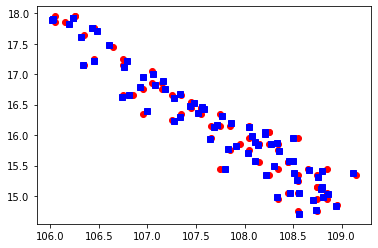

In [ ]:
plt.plot(data1['map_lon'],data1['map_lat'],'ro')
plt.plot(data1['gauge_lon'],data1['gauge_lat'],'bs')

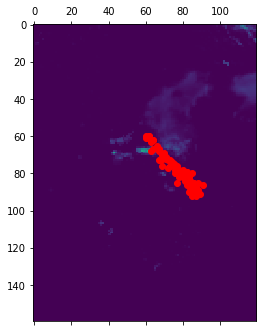

In [ ]:
plt.matshow(data2.variables['precip'][7])
plt.plot((data1['map_lon'] - min(data2.variables['lon']))/0.1,(max(data2.variables['lat']) - data1['map_lat'])/0.1,'ro')

In [ ]:
data1['map_lon']

array([108.15, 107.25, 108.85, 107.85, 106.45, 108.75, 107.55, 108.25,
       108.25, 107.75, 108.75, 107.45, 106.35, 107.15, 108.55, 106.85,
       108.25, 106.95, 107.05, 106.65, 106.05, 108.85, 108.15, 106.95,
       108.55, 107.05, 107.65, 108.15, 108.05, 108.05, 108.35, 107.95,
       107.55, 107.75, 106.75, 106.75, 107.55, 108.45, 106.75, 109.15,
       106.15, 106.25, 108.75, 107.25, 107.75, 108.05, 108.65, 107.35,
       106.35, 107.45, 108.75, 108.55, 108.85, 108.45, 108.35, 107.35,
       108.45, 106.25, 106.45, 106.95, 107.15, 108.35, 107.85, 107.65,
       108.35, 108.55, 108.95, 108.75, 108.25, 106.45, 106.05, 108.55],
      dtype=float32)

In [ ]:
print(data1['map_lon'])
print(data1['map_lat'])

[108.15 107.25 108.85 107.85 106.45 108.75 107.55 108.25 108.25 107.75
 108.75 107.45 106.35 107.15 108.55 106.85 108.25 106.95 107.05 106.65
 106.05 108.85 108.15 106.95 108.55 107.05 107.65 108.15 108.05 108.05
 108.35 107.95 107.55 107.75 106.75 106.75 107.55 108.45 106.75 109.15
 106.15 106.25 108.75 107.25 107.75 108.05 108.65 107.35 106.35 107.45
 108.75 108.55 108.85 108.45 108.35 107.35 108.45 106.25 106.45 106.95
 107.15 108.35 107.85 107.65 108.35 108.55 108.95 108.75 108.25 106.45
 106.05 108.55]
[15.85 16.25 14.95 16.15 17.75 14.75 16.35 16.05 15.85 16.35 15.35 16.45
 17.15 16.85 15.95 16.65 16.05 16.75 16.85 17.45 17.95 15.45 15.85 16.95
 14.75 17.05 15.95 15.55 16.15 15.95 15.85 15.85 16.45 15.45 16.65 17.15
 16.45 15.55 17.25 15.35 17.85 17.95 14.95 16.65 16.15 15.75 15.45 16.65
 17.65 16.55 15.15 15.05 15.05 15.05 14.95 16.35 15.55 17.95 17.75 16.35
 16.75 15.75 15.75 16.15 15.45 15.25 14.85 15.15 15.35 17.25 17.85 15.35]


In [ ]:
print(data2.variables['lon'][:])
print(data2.variables['lat'][:])

[100.05 100.15 100.25 100.35 100.45 100.55 100.65 100.75 100.85 100.95
 101.05 101.15 101.25 101.35 101.45 101.55 101.65 101.75 101.85 101.95
 102.05 102.15 102.25 102.35 102.45 102.55 102.65 102.75 102.85 102.95
 103.05 103.15 103.25 103.35 103.45 103.55 103.65 103.75 103.85 103.95
 104.05 104.15 104.25 104.35 104.45 104.55 104.65 104.75 104.85 104.95
 105.05 105.15 105.25 105.35 105.45 105.55 105.65 105.75 105.85 105.95
 106.05 106.15 106.25 106.35 106.45 106.55 106.65 106.75 106.85 106.95
 107.05 107.15 107.25 107.35 107.45 107.55 107.65 107.75 107.85 107.95
 108.05 108.15 108.25 108.35 108.45 108.55 108.65 108.75 108.85 108.95
 109.05 109.15 109.25 109.35 109.45 109.55 109.65 109.75 109.85 109.95
 110.05 110.15 110.25 110.35 110.45 110.55 110.65 110.75 110.85 110.95
 111.05 111.15 111.25 111.35 111.45 111.55 111.65 111.75 111.85 111.95]
[23.95 23.85 23.75 23.65 23.55 23.45 23.35 23.25 23.15 23.05 22.95 22.85
 22.75 22.65 22.55 22.45 22.35 22.25 22.15 22.05 21.95 21.85 21.75 21.65
 

In [ ]:
def cmp(a,b,e = 1e-5):
  return abs(a-b) <= e

In [ ]:
def to_matrix(k):  
  y_train = np.empty((0),float)
  x_train = np.empty((0, k, k), float)
  max_lat = max(data2.variables['lat'][:])
  min_lon = min(data2.variables['lon'][:])
  A = data2.variables['precip'][:]
  for j in range(len(data1['map_lat'])):
    c = np.around((data1['map_lon'][j] - min_lon)/0.1, decimals=2)
    r = np.around((max_lat - data1['map_lat'][j])/0.1, decimals=2)
    min_c, max_c = int(c - k//2),int(c + k//2 + 1)
    min_r, max_r = int(r - k//2),int(r + k//2 + 1)  
    x_train = np.append(x_train,np.copy(A[:,min_r:max_r,min_c:max_c]),axis=0)
    y_train = np.append(y_train,data1['gauge_precip'][:,j],axis=0)
  print(x_train.shape)
  print(y_train.shape)
  return x_train,y_train.reshape(-1,1)

In [ ]:
size_matrix = 11
X,Y = to_matrix(size_matrix)

(127152, 11, 11)
(127152,)


In [ ]:
index_test = [11,40,42,22,9,61,58,37,50,44,18]
index_test.sort()
index_test

[9, 11, 18, 22, 37, 40, 42, 44, 50, 58, 61]

In [ ]:
X_train = np.empty((0,size_matrix,size_matrix), float)
X_test = np.empty((0,size_matrix,size_matrix), float)
y_train = np.empty((0,1), float)
y_test = np.empty((0,1), float)
for i in range(72):
  temp = i*1766
  if(i+1 in index_test):
    X_test = np.append(X_test, X[temp:temp+1766], axis=0)
    y_test = np.append(y_test, Y[temp:temp+1766], axis=0)
  else:
    X_train = np.append(X_train,X[temp:temp+1766], axis=0)
    y_train = np.append(y_train, Y[temp:temp+1766], axis=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(107726, 11, 11)
(19426, 11, 11)
(107726, 1)
(19426, 1)


In [ ]:
def model_CNN():
  model = models.Sequential()
  model.add(layers.Conv1D(6, (3), activation='relu',padding='same',input_shape=(size_matrix, size_matrix)))  #31x31x6
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling1D((2), strides=(2))) # 15*15*6
  model.add(layers.Conv1D(12, (3), activation='relu', padding='same')) # 15*15*12
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling1D((4), strides=(4))) # 3*3*12
  model.add(layers.Flatten())
  model.add(layers.Dense(50, activation='relu'))
  #model.add(layers.BatchNormalization())
  model.add(layers.Dense(1))
  return model

In [ ]:
model = model_CNN()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 11, 6)             204       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 5, 6)              0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 12)             228       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 12)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5

In [ ]:
def custom_loss(y_actual,y_pred): 
    custom_loss1 = tf.keras.losses.mean_squared_error(y_actual,y_pred)
    custom_loss2 = tf.keras.losses.mean_absolute_error(y_actual, y_pred)
    return custom_loss1 + custom_loss2
    #return custom_loss1

In [ ]:
model.compile(optimizer='adam',
              loss= custom_loss,
              metrics= [tf.keras.metrics.MeanSquaredError()])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
3367/3367 [==============================] - 10s 3ms/step - loss: 580.0099 - mean_squared_error: 570.9344 - val_loss: 436.4219 - val_mean_squared_error: 427.6939
Epoch 2/10
3367/3367 [==============================] - 8s 2ms/step - loss: 580.8514 - mean_squared_error: 571.1423 - val_loss: 425.4528 - val_mean_squared_error: 416.8883
Epoch 3/10
3367/3367 [==============================] - 8s 3ms/step - loss: 601.6300 - mean_squared_error: 592.1471 - val_loss: 425.2575 - val_mean_squared_error: 416.5942
Epoch 4/10
3367/3367 [==============================] - 9s 3ms/step - loss: 584.9541 - mean_squared_error: 575.5040 - val_loss: 431.6173 - val_mean_squared_error: 423.1734
Epoch 5/10
3367/3367 [==============================] - 9s 3ms/step - loss: 575.4128 - mean_squared_error: 565.9991 - val_loss: 426.7432 - val_mean_squared_error: 418.5918
Epoch 6/10
3367/3367 [==============================] - 9s 3ms/step - loss: 554.6132 - mean_squared_error: 545.4851 - val_loss: 418.7185 - 

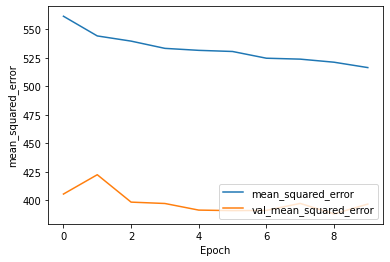

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.legend(loc='lower right')

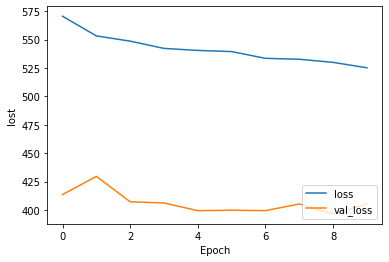

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('lost')
plt.legend(loc='lower right')

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 1.0407392 ],
       [ 0.87906647],
       [ 0.69371194],
       ...,
       [26.333696  ],
       [11.510398  ],
       [19.81666   ]], dtype=float32)

In [ ]:
plt.plot(y_pred[:1767], label='y_pred')
plt.plot(y_test[:1767], label = 'y_test')
plt.legend(loc='lower right')

SyntaxError: ignored

In [ ]:
import glob

In [ ]:
a = glob.glob("/content/drive/MyDrive/PrecipitationData/preprocessed_gauge_data/*.csv")
a.sort()
a = np.array([a[i].split('/') for i in range(len(a))])
a = list(a[:,6])
data_input = np.empty((0,3), float)
for i in range(len(a)):
  w = np.empty((0), float)
  temp = a[i].split('_')
  for j in range(1,len(temp)-1):
    w = np.append(w,np.copy(float(temp[j])))
  w = np.append(w,np.copy(float(temp[3].split('.')[0])))
  data_input = np.append(data_input, np.copy([w]),axis=0)

data_input.shape

(72, 3)

In [ ]:
def to_matrix2(k):
  y_train = np.empty((0),float)
  x_train = np.empty((0, k*k + 3), float)
  max_lat = max(data2.variables['lat'][:])
  min_lon = min(data2.variables['lon'][:])
  A = data2.variables['precip'][:]
  for j in range(len(data1['map_lat'])):
    c = np.around((data1['map_lon'][j] - min_lon)/0.1, decimals=2)
    r = np.around((max_lat - data1['map_lat'][j])/0.1, decimals=2)
    min_c, max_c = int(c - k//2),int(c + k//2 + 1)
    min_r, max_r = int(r - k//2),int(r + k//2 + 1)  
    w = np.empty((0, k*k), float)
    w = np.append(w,np.copy(A[:,min_r:max_r,min_c:max_c].reshape(A.shape[0],k*k)),axis=0)
    for i in data_input:
      if(cmp(i[0],data1['gauge_lon'][j]) == True and cmp(i[1],data1['gauge_lat'][j]) == True):
        w = np.append(w,np.copy(np.ones((A.shape[0], 1))*np.array(i)),axis=1)
        break
    x_train = np.append(x_train,np.copy(w),axis=0)  
    y_train = np.append(y_train,data1['gauge_precip'][:,j],axis=0)
  print(x_train.shape)
  print(y_train.shape)
  return x_train,y_train.reshape(-1,1)

In [ ]:
X,y = to_matrix2(size_matrix)

(127152, 964)
(127152,)


In [ ]:
X_train = np.empty((0,size_matrix*size_matrix + 3), float)
X_test = np.empty((0,size_matrix*size_matrix + 3), float)
y_train = np.empty((0,1), float)
y_test = np.empty((0,1), float)
for i in range(72):
  temp = i*1766
  if(i+1 in index_test):
    X_test = np.append(X_test, X[temp:temp+1766], axis=0)
    y_test = np.append(y_test, Y[temp:temp+1766], axis=0)
  else:
    X_train = np.append(X_train,X[temp:temp+1766], axis=0)
    y_train = np.append(y_train, Y[temp:temp+1766], axis=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(107726, 964)
(19426, 964)
(107726, 1)
(19426, 1)


In [ ]:
def model_CNN2():
  inputs = keras.Input(shape=(X_train.shape[1]))
  x1 = tf.reshape(inputs[:,:-3],[-1,size_matrix,size_matrix])
  x2 = inputs[:,-3:]
  x = layers.Conv1D(6, (3), activation='relu',padding='same')(x1)
  x = layers.MaxPooling1D((2), strides=(2))(x)
  x = layers.Conv1D(12, (3), activation='relu', padding='same')(x)
  x = layers.MaxPooling1D((4), strides=(4))(x)
  x = layers.Flatten()(x)
  x = tf.keras.layers.Concatenate(axis=1)([x, x2])
  x = layers.Dense(50, activation='relu')(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs,outputs)
  return model

In [ ]:
model1 = model_CNN2()
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 964)]        0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 961)          0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 31, 31)       0           tf.__operators__.getitem[0][0]   
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 31, 6)        564         tf.reshape[0][0]                 
______________________________________________________________________________________________

In [ ]:
model1.compile(optimizer='adam',
              loss= custom_loss,
              metrics= [tf.keras.metrics.MeanSquaredError()])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50
3367/3367 [==============================] - 43s 3ms/step - loss: 758.6465 - mean_squared_error: 747.0337 - val_loss: 424.5593 - val_mean_squared_error: 417.2596
Epoch 2/50
3367/3367 [==============================] - 11s 3ms/step - loss: 541.4565 - mean_squared_error: 532.0786 - val_loss: 415.0892 - val_mean_squared_error: 406.3944
Epoch 3/50
3367/3367 [==============================] - 11s 3ms/step - loss: 528.0899 - mean_squared_error: 518.8734 - val_loss: 408.7263 - val_mean_squared_error: 401.0139
Epoch 4/50
3367/3367 [==============================] - 11s 3ms/step - loss: 539.2859 - mean_squared_error: 530.0120 - val_loss: 453.6674 - val_mean_squared_error: 445.3546
Epoch 5/50
3367/3367 [==============================] - 11s 3ms/step - loss: 559.7177 - mean_squared_error: 550.4677 - val_loss: 409.8694 - val_mean_squared_error: 401.0022
Epoch 6/50
3367/3367 [==============================] - 11s 3ms/step - loss: 515.2561 - mean_squared_error: 506.1129 - val_loss: 410.30

In [ ]:
model1.save('/content/drive/MyDrive/PrecipitationData/mode1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/PrecipitationData/mode1/assets


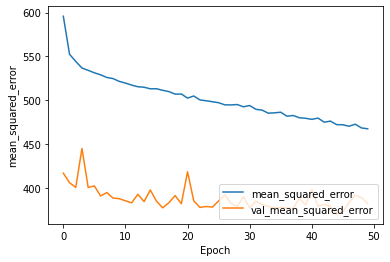

In [ ]:
plt.plot(history1.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history1.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.legend(loc='lower right')

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([[ 0.12841499],
       [ 0.44675958],
       [ 1.9431762 ],
       ...,
       [21.721487  ],
       [12.328702  ],
       [14.013825  ]], dtype=float32)

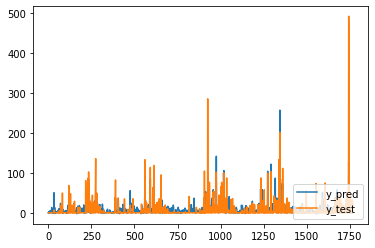

In [ ]:
plt.plot(y_pred[:1767], label='y_pred')
plt.plot(y_test[:1767], label = 'y_test')
plt.legend(loc='lower right')

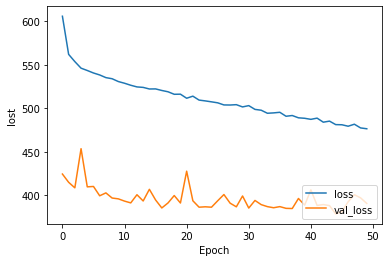

In [ ]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('lost')
plt.legend(loc='lower right')
plt.savefig('loss_luong_mua_tram.pdf')  

In [ ]:
y_test.shape

(19426, 1)

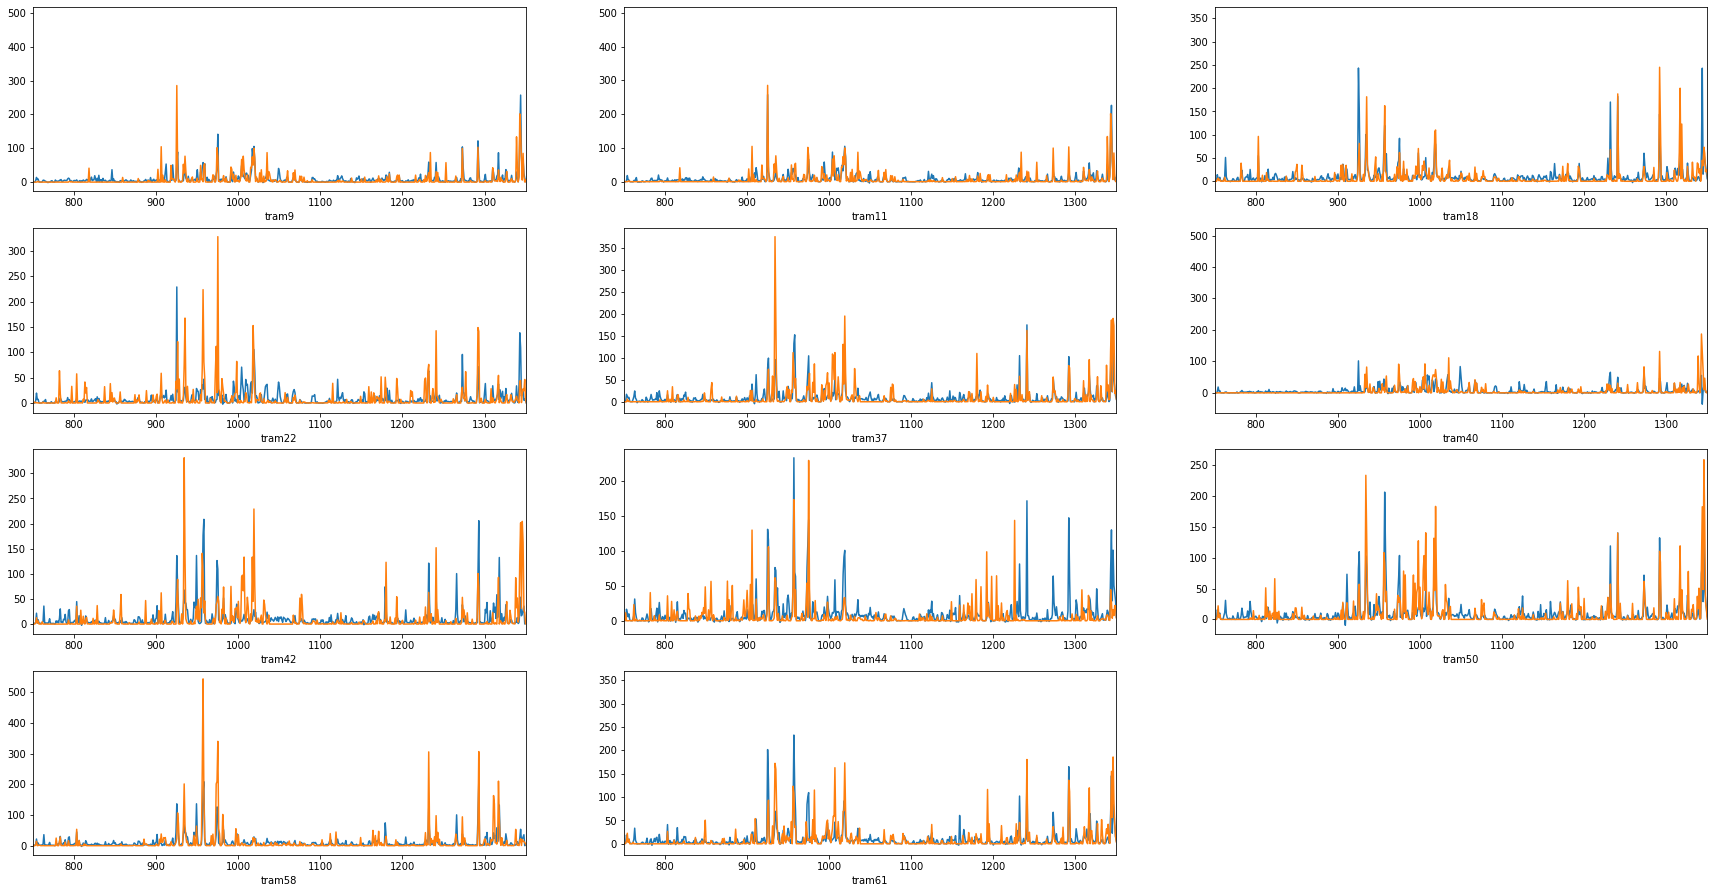

In [ ]:
rows = 10
columns = 3
fig=plt.figure(figsize=(30, 40))
for i in range(y_test.shape[0]//1766):
    fig.add_subplot(rows, columns, i+1)
    plt.plot(y_pred[i*1766:(i*1766 + 1766)],label='y_pred')
    plt.plot(y_test[i*1766:(i*1766 + 1766)],label = 'y_test')
    plt.xlabel('tram'+ str(index_test[i]))
    plt.xlim([750 , 1350])
plt.savefig('luong_mua_tram_750_1350.pdf')  

In [ ]:
X_test[:1767]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08273000e+02, 1.58580000e+01, 1.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08273000e+02, 1.58580000e+01, 1.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08273000e+02, 1.58580000e+01, 1.20000000e+01],
       ...,
       [3.92887890e-02, 5.07198982e-02, 1.19633012e-01, ...,
        1.08273000e+02, 1.58580000e+01, 1.20000000e+01],
       [5.17908223e-02, 5.04513718e-02, 5.92124127e-02, ...,
        1.08273000e+02, 1.58580000e+01, 1.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08759000e+02, 1.53060000e+01, 5.00000000e+00]])

In [ ]:
y_test[i*1766:(i*1766 + 1766)].shape

(1766, 1)

In [ ]:
y_pred = model1.predict(X_test)
print(int(tf.reduce_mean(tf.keras.losses.mean_squared_error(y_test,y_pred))))

382


In [ ]:
rows = 10
columns = 3
fig=plt.figure(figsize=(30, 40))
for i in range(len(index_test)):
  y_pred = model1.predict(X_test[i*1766:(i*1766 + 1766)])
  print('MSE trung binh tram ' + str(index_test[i]) + ':',end=' ')
  print(float(tf.reduce_mean(tf.keras.losses.mean_squared_error(y_test[i*1766:(i*1766 + 1766)],y_pred))))
y_pred = model1.predict(X_test)
print('MSE trung binh cac tram: ',end='')
print(float(tf.reduce_mean(tf.keras.losses.mean_squared_error(y_test,y_pred))))
#plt.savefig('luong_mua_tram.pdf')  

MSE trung binh tram 9: 337.951904296875
MSE trung binh tram 11: 346.3382568359375
MSE trung binh tram 18: 376.2342224121094
MSE trung binh tram 22: 443.03594970703125
MSE trung binh tram 37: 362.8835144042969
MSE trung binh tram 40: 385.59295654296875
MSE trung binh tram 42: 564.87548828125
MSE trung binh tram 44: 296.0048828125
MSE trung binh tram 50: 303.2958984375
MSE trung binh tram 58: 403.9073486328125
MSE trung binh tram 61: 388.41680908203125
MSE trung binh cac tram: 382.5942687988281


<Figure size 2160x2880 with 0 Axes>

In [ ]:
model2 = keras.models.load_model('/content/drive/MyDrive/PrecipitationData/mode1',custom_objects={'custom_loss': custom_loss})

NameError: ignored

In [ ]:
model2.save_weights('/content/drive/MyDrive/PrecipitationData/model1_weights.h5')


In [ ]:
model2 = model_CNN2()
model2.load_weights('/content/drive/MyDrive/PrecipitationData/model1_weights.h5')
model2.compile(optimizer='adam',
              loss= custom_loss,
              metrics= ['mape'])

In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([[ 0.1284169],
       [ 0.446761 ],
       [ 1.9431728],
       ...,
       [21.72149  ],
       [12.3287   ],
       [14.013827 ]], dtype=float32)

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([[14.285983 ],
       [14.274637 ],
       [14.210918 ],
       ...,
       [14.3893795],
       [14.423114 ],
       [14.367853 ]], dtype=float32)

In [ ]:
y_pred = model2.predict(X_test[i*1766:(i*1766 + 1766)])
(y_test[i*1766:(i*1766 + 1766)] - y_pred)/y_test[i*1766:(i*1766 + 1766)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([[       -inf],
       [ 3.45963633],
       [ 0.63194072],
       ...,
       [-0.13132765],
       [ 0.71461338],
       [ 0.54203197]])

In [ ]:
for i in range(len(index_test)):
  y_pred = model2.predict(X_test[i*1766:(i*1766 + 1766)])
  print('MAPE trung binh tram ' + str(index_test[i]) + ':',end=' ')
  #print(100. * np.mean(np.abs((y_test[i*1766:(i*1766 + 1766)] - y_pred) / y_test[i*1766:(i*1766 + 1766)])))
  print(float(tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_test[i*1766:(i*1766 + 1766)],y_pred))))
y_pred = model2.predict(X_test)
print('MAPE trung binh cac tram: ',end='')
print(float(tf.reduce_mean(tf.keras.losses.mean_absolute_percentage_error(y_test,y_pred))))

MAPE trung binh tram 9: 2200760832.0
MAPE trung binh tram 11: 1989851648.0
MAPE trung binh tram 18: 2215236864.0
MAPE trung binh tram 22: 2596611840.0
MAPE trung binh tram 37: 2143070080.0
MAPE trung binh tram 40: 2087289216.0
MAPE trung binh tram 42: 2665609216.0
MAPE trung binh tram 44: 2045261184.0
MAPE trung binh tram 50: 2074500352.0
MAPE trung binh tram 58: 2386998272.0
MAPE trung binh tram 61: 2192920064.0
MAPE trung binh cac tram: 2236191744.0


In [ ]:
!pip install pytorch_forecasting

     |████████████████████████████████| 112kB 4.1MB/s 
     |████████████████████████████████| 112kB 6.7MB/s 
     |████████████████████████████████| 22.3MB 147kB/s 
     |████████████████████████████████| 849kB 35.4MB/s 
     |████████████████████████████████| 296kB 31.3MB/s 
     |████████████████████████████████| 829kB 31.0MB/s 
     |████████████████████████████████| 184kB 48.7MB/s 
     |████████████████████████████████| 276kB 50.5MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 163kB 48.3MB/s 
     |████████████████████████████████| 112kB 47.8MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 143kB 55.3MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=40182e32ecc7588de4108d5c6e5016d9a5c0cbf65c69e5e64e6e3210a543f826
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9

In [ ]:
from pytorch_forecasting.metrics import SMAPE

In [ ]:
losser = SMAPE()
for i in range(len(index_test)):
  y_pred = model2.predict(X_test[i*1766:(i*1766 + 1766)])
  loss = losser.loss(torch.tensor(y_pred, dtype=float), torch.tensor(y_test[i*1766:(i*1766 + 1766)], dtype=torch.float))
  print('SMAPE trung binh tram ' + str(index_test[i]) + ':',end=' ')
  print(float(100. * torch.mean(loss)))
  #print(100. * np.mean(np.abs((y_test[i*1766:(i*1766 + 1766)] - y_pred) / y_test[i*1766:(i*1766 + 1766)])))
  #print(float(tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_test[i*1766:(i*1766 + 1766)],y_pred))))
y_pred = model2.predict(X_test)
loss = losser.loss(torch.tensor(y_pred, dtype=float), torch.tensor(y_test, dtype=torch.float))
print('SMAPE trung binh cac tram: ',end='')
print(float(100. * torch.mean(loss)))

SMAPE trung binh tram 9: 162.35676164769038
SMAPE trung binh tram 11: 165.4126176376379
SMAPE trung binh tram 18: 156.63135399916172
SMAPE trung binh tram 22: 161.31220372771037
SMAPE trung binh tram 37: 161.60492990554786
SMAPE trung binh tram 40: 168.58919668633874
SMAPE trung binh tram 42: 159.98176865092117
SMAPE trung binh tram 44: 155.65846238174626
SMAPE trung binh tram 50: 158.43287720612486
SMAPE trung binh tram 58: 158.55807008914218
SMAPE trung binh tram 61: 155.00601801059275
SMAPE trung binh cac tram: 160.3222045900817
